#### <center> Mini Project 1 - 2D Simulation of a Hard Disk System
 <center> $John \ Alexander \ Osorio \ Henao ^{1}$
   <center> $^{1}$ Institute of Physics, Universidad de Antioquia
           
#### <center> April 16, 2020
--------------------------------------------------------------
    

## <center> Abstract

In the present work, the equiprobability principle is studied through a 2D system of $4$ rigid disks in a unit box, whose possible configurations are studied through sampling by Monte Carlo methods and the event-driven molecular dynamics method. The variation of the uncertainty of the center of mass in the probability calculation is also studied. It is found that the values differ if this value is increased. In addition, the distribution of the $x$ coordinate of the hard disks is studied and it is obtained that it is not a uniform distribution. Finally, a simulation of the motion of the disks inside the box is presented.
    
#### Keywords:
Monte-Carlo, direct-sampling Monte Carlo, markov Chain Monte Carlo, simulation, event-driven molecular dynamics.

## <center> I. Introduction
Monte Carlo methods are a set of computational techniques used to find approximate solutions to problems of considerable degree of difficulty or not analytically realizable. This has given them a high degree of popularity. [1-4]. These methods allow the use of random numbers to simulate processes that are governed by a probability distribution such as natural processes, including thermal motion or radioactive decay [2, 3], but can also be used in various areas such as finance, meteorology, epidemiology, among others [5-7]. 
    
As such a Monte Carlo is a stochastic process, i.e., a sequence of randomly evolving states [4]. On the other hand, Markov chains are also stochastic processes, in which the current state of the system depends only on the state at the immediately preceding time [8]. Markov chains allow the study of a wide range of problems, such as the study of human migration [9], Brownian motion [10], population growth, music and image generation, among others [11].  
  
Through these methods, even fundamental principles in physics such as equiprobability can be demonstrated. For this purpose, a 2D system of hard disks in a box is considered and the system configurations are sampled using the direct sampling method and the Markov chain method. It should be noted that for this system, these samples, especially the Markov chains, are an approximation to a more complex method known as the event-driven molecular dynamics sampling method. Molecular dynamics is the result of integrating Newton's laws of motion, which describe the time evolution of a system of particles. [12, 13]
    
In this paper we aim to demonstrate the equiprobability principle by implementing the Monte Carlo sampling methods and the event-driven sampling method for a 2D system of $4$ hard disks. In addition, the motion of the particles in the box is simulated for the latter type of sampling mentioned.

###### <center> II. Theoretical Framework

### Equiprobability Principle
    
The equiprobability principle or a priori equiprobability postulate states that in an isolated system, all allowed and possible configurations have equal probability. That is, it is equally likely to find the system in any of its accessible states. This principle is fundamental to statistical physics. [14]

### 2D model of hard disks
    
One way to demonstrate the equiprobability principle numerically consists in the use of a 2D system of $N$ rigid disks in a box of side $L$ [13], each of radius $\sigma$, Fig. 1. To further differentiate the position $(x, y)$ of the center of mass of each disk, the variable $\delta_{xy}$ is used, represented in the figure through red rectangles of side $\delta_{xy}$. Therefore, two centers of mass with coordinates $(x, y)$ and $(x + \delta x , y + \delta y)$ are considered equal if $\delta x, \delta y < \delta_{xy}$.
    
    
<img src="confs.png" alt="drawing" width="500"/>

>Simulation of a 2D system of hard disks in a box.
    
If one takes, for example, three configurations, $(a, b, c)$, accessible from this system, where each is defined by the positions of the centers of mass of the disks, then by sampling methods one could calculate the probability that the system is in one of these configurations. If the equiprobability principle is true, the three probabilities should be equal.
    
### Direct sampling method
    
The direct sampling method refers to the production of independent samples of a given random variable, which in the case of the isolated system, would be the configurations. Thus, in the direct sampling method, all configurations, both legal and not, are generated with the same probability and those that are not accessible to the system are rejected. Clearly, the remaining configurations are equally likely. [13]
    
For the case of the 2D system mentioned above, the algorithm for direct sampling is as follows:
    
1. A set of $n$ test configurations of all possible configurations is defined. 
2. For each configuration, a variable $hits$ is set, to consider the number of times the system is in this configuration.
2. A fixed number of interactions, $n_{runs}$, is set to run the program.
3. For each $run$ interaction, a set of $N$ random disks are generated uniformly in the box through a subroutine, in which first a random disk is generated, and the other $N-1$ disks are generated randomly taking into account that they must not overlap or be the same as any of the disks already generated. This subroutine only ends until all $N$ disks have been generated, therefore, each $run$ corresponds to a valid configuration.
4. It is verified if this set corresponds to one of the test configurations, and if so, its respective variable $hits$ is increased by 1. 
5. At the end, the program returns the test configurations together with their $hits$.
    
From these $hits$ equiprobability can be studied. Since for each $run$ one possible configuration is generated, then the total number of valid configurations generated is simply $n_{runs}$. Therefore, the probability for a given $a$ configuration is:
    
$$P(a) = \frac{hits(a)}{n_{runs}}  \> \> (1)$$
    
This method has the disadvantage that to obtain a valid configuration, many random disks must be generated and each disk must be accepted or rejected depending on its overlap with those already generated. This increases the computation time considerably [13].
    
    
### Sampling with Markov chains
    
A Markov chain is a stochastic process of a system in which the conditional probability is satisfied: 
    
\begin{equation}
    P(X_{t+1}|X_t, X_{t-1},...,X_0) = P(X_{t+1}|X_t) \> \> (2)
\end{equation}

Where $X_t$ is the state $X$ of a system at time $t$ and $t$ is considered to be a discrete value. This implies that $X_{t+1}$ depends only on the state $X_{t}$ but exhibits independence with respect to $X_{t'}$, with $t' < t$. It is said to be a memoryless process. [15]
    
Sampling by Markov chains is based on this fact, that for the case of 2D system, it must be guaranteed that going from one state or configuration $a$, to another configuration $b$, must have the same probability as doing it in the opposite way. It should be noted that the case $a = b$ is also possible. Thus, the algorithm is defined as follows [13]:
    
0. Steps 1-3 of the previous algorithm are repeated.
1. The configuration $a$ is given a random initial value from all possible ones.
2. For each interaction, one of the disks of configuration $a$ is chosen at random. 
3. The coordinates $(x, y)$ of the chosen disk are shifted randomly within a square of side $(x, y)$ centered at $(x, y)$, where the variable $(x, y)$ is defined as the maximum displacement of the disk. Thus, the $x$-coordinate can be uniformly displaced to any position between in $\left[x-\delta, x + \delta \right]$. The same for the $y$ coordinate.
5. It is verified that this new disk position is found to lie inside the box and is not already included in the $a$ configuration.
6. If the previous step is true, then the system is considered to be in a new configuration and this is taken as the new value of $a$.
7. It is verified if this new configuration is part of some of the test configurations and if so, its respective variable $hits$ is increased by 1. 
8. If step 5 is false, then the same value of $a$ is kept, but its counter is increased by 1, since the system remains in the same configuration for the given interaction.
9. Step 2 is repeated.
10. At the end, the program returns the test configurations together with their $hits$.
 
Equiprobability is also defined through equation $(1)$, the reason being that for each interaction, the system is in a valid configuration (including the case where the configuration does not change). 
    
Although this algorithm is faster than the direct one, it has the disadvantage that the disks move very little inside the box for each interaction. There is a third algorithm that is much faster and to which Markov chain sampling is somewhat similar, which we will see next. [16]

### Event-driven molecular dynamics

We refer again to the 2D system of rigid disks in a box. Molecular dynamics studies the motion of the disks (particles) inside the box, which is considered to have fixed walls (i.e. no periodic conditions). Moreover, in the simplest model, it is considered that the particles can move only during small time intervals, where there is a constant force (equal to zero). [13, 16]

Specifically, in the event-driven molecular dynamics algorithm, one starts from an initial configuration, where each particle has an initial position and velocity. The particles then start their path in a straight line until they encounter a collision. In this aspect, two types of collision events are considered: that of a particle with one of the walls of the box, or between pairs of particles. In all cases, the collisions are elastic. The time of the next event can be known exactly if all disks are considered. Therefore, the algorithm focuses on the next event and evolves the system to this event. [13, 16]

Specifically, the calculation of the next event is performed as follows. For the case of pairwise collisions, a pair of particles (k, l) of radius $$ \sigma$ is considered and isolated from the rest of the system, leading to the equations of motion:

$$ \mathbf{x}_{k, l} (t) = \mathbf{x}_{k, l}(t_0) + \mathbf{v}_{k, l} * (t - t_0) \> \> (3) $$

Therefore, one has a collision when $$ \mathbf{x}(t) = \mathbf{x}_0 + \mathbf{v} * (t - t_0) = 2 \sigma$, from which the quadratic equation results:

$$t_{1, 2} = t_0 + \frac{ -\left(\Delta \mathbf{x} \cdot \Delta \mathbf{v}\right) \pm \sqrt{(\Delta \mathbf{x} \cdot \Delta \mathbf{v})^2 - (\Delta \mathbf{v})^2((\Delta \mathbf{x})^2 - 4\sigma^2)}}{(\Delta \mathbf{v})^2} \> \> (4) $$

From which the positive time is taken and it is considered that the particles must approach $\left(\Delta \mathbf{x} \cdot \Delta \mathbf{v}\right) < 0 $. For more details review [13, 16]. The time of the next event would be the smallest of the collision times between pairs of particles. A similar procedure is followed for the wall collision case.

The velocities after the collision are calculated taking into account that these are elastic collisions. For collisions against walls, the sign of the velocity component normal to the wall is simply changed. While for the case of pairwise collisions, the velocities at the center of mass of the two disks are analyzed, such that $$\mathbf{v}_l + \mathbf{v}_k = 0$$. In this case, the new velocities result:

$$\mathbf{v'}_k = \mathbf{v}_k + \hat{e}_{\perp} \left( \Delta \mathbf{v}_k \cdot \hat{e}_{\perp} \right), 
\mathbf{v'}_l = \mathbf{v}_l - \hat{e}_{\perp} \left( \Delta \mathbf{v}_l \cdot \hat{e}_{\perp} \right) \> \> (5) $$


With $\hat{e}_{\perp} = \frac{x_k - x_l}{|x_k - x_l|}.$

By analyzing the configurations of the system at each time instant in which it evolves, then sampling can be done and equiprobability can be studied again.

## <center> III. Results and Discussion

For the 2D system, a unit side box ($L = 1$) and $N = 4$ rigid disks were taken. The following three configurations are also chosen for the positions of the centers of mass of the disks:

$$\Omega_a = ((0.30, \ 0.30), \ (0.30, \ 0.70), \ (0.70, \ 0.30), \ (0.70, \ 0.70)) \\
\Omega_b = ((0.20,\ 0.20), \ (0.20, \ 0.80), \ (0.75, \ 0.25), \ (0.75, \ 0.75)) \\
\Omega_c = ((0.30, \ 0.20), \ (0.30, \ 0.80), \ (0.70, \ 0.20), \ (0.70, \ 0.70))$$
    

    
### Equiprobability using direct sampling
    
The function <b>random.uniform(a, b)</b>, which allows to generate a random number uniformly among the range $[a, b]$, is used.

The direct sampling method is performed for a radius of $\sigma = 0.15$ and for two cases of the variable $\delta_{xy} = 0.05, 0.10$, where in each case, the program is run for different numbers of total interactions ($n_{runs} = 2^4, 2^5, 2^6$) and in addition, for each $n_{runs}$ the run is repeated three times. Once the number of hits is calculated for each configuration given a $n_{runs}$, it is averaged for the three times run and on this average the probability of the configuration is considered.

Table 1 shows the results for all the configurations considered.

In [ ]:
#----------------Librerías------------------#
import math, pylab, random, os
import numpy as np
from IPython.display import display, Markdown

In [ ]:
#---------------Configuraciones escogidas----------#
conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70, 0.70))
conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75, 0.75))
conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70, 0.70))

#Arreglo con las configuraciones
configurations = [conf_a, conf_b, conf_c]

In [ ]:
#Método para generar N discos, que no se superponen, de radio sigma dentro de la caja.
def direct_disks_box(N, sigma):
    #Mediante esta condición se determina si se han generado los N discos requeridos
    condition = False
    while condition == False:
        #Se genera una posición (x, y) aleatoria tomando en cuentra el radio de los discos
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        #Se generan las demás N-1 posiciones
        for k in range(1, N):
            #Se genera una posición (x, y) aleatoria tomando en cuentra el radio de los discos
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            #Se calcula la distancia mínima de la posición a respecto a las posiciones ya generadas
            min_dist = min(math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2) for b in L)
            #En caso de que el disco generado se superponga con uno de los discos ya generdos, se comienza de nuevo el proceso.
            if min_dist < 2.0*sigma:
                condition = False
                break
            else:
                L.append(a)#Se agrega la nueva posición si no existe.
                condition =  True
    return L

In [ ]:
#Método para calcular el número de hits de cada configuración dado el número de interacciones, 
## el radio y la incertidumbre de la posición del centro de masa
def direct_hits_calc(sigma, del_xy, n_runs):
    #Diccionario para almacenar los hits de cada configuración
    hits = {conf_a: 0, conf_b: 0, conf_c: 0}
    #Se hace un loop por el número de interacciones escogidas
    for run in np.arange(n_runs):
        #Se genera una configuración valida aleatoria
        x_vec = direct_disks_box(4, sigma)
        #Se recorre sobre las configuraciones
        for conf in configurations:
            #Condicional para validar si la configuración generada corresponde a una de las configuraciones escogidas
            condition_hit = True
            #Se recorren los discos de la configuración
            for b in conf:
                #Tomando una incertidumbre del_xy en las posiciones x, y, se valida si el disco se encuentra
                #en la configuración generada. Esto retorna un valor verdadero o falso dependiendo de si se encuentra el disco.
                condition_b = min(max(abs(a[0]-b[0]), abs(a[1]-b[1])) for a in x_vec) < del_xy
                #hacemos un "&" sobre el condition_hit, de manera que si uno de los discos de la configuración establecida
                #no se encuentra en la configuración generada, entonces condition_hit se vuelve falso y por ende no se aumentar
                #el valor de hits.
                condition_hit *= condition_b
            if condition_hit:
                #se aumenta el valor de hits en caso de que la configuración establecida coincida con la generada.
                hits[conf] += 1
    #print("sigma: ", sigma, "del_xy: ", del_xy, "n_runs: ", n_runs)
    #for conf in configurations:
    #    print(conf, " - hits: ", hits[conf])
    return hits

In [ ]:
#Método personalizado para imprimir los resultados como tabla.
def print_table(sigma, n_runs, del_xy):
    table ='''<table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr>'''
    hits_avg = {conf_a: 0, conf_b: 0, conf_c: 0}
    for i in range(3):#se recorre 3 veces por cada n_runs
        table+="<tr><td> %d </td>"%(i+1)
        hits = direct_hits_calc(sigma, del_xy, n_runs)
        for conf in configurations:
            table += "<td> %d </td>"%hits[conf]
            hits_avg[conf] += hits[conf]#para promediar el valor de los hits por las tres corridas
        table+="</tr>"
    table+="<tr><td><b>Prom</b></td>"
    for conf in configurations:
        table += "<td> %0.1f </td> "%(hits_avg[conf]/3)#calculo del promedio
    table+=" <tr/>"
    table+="<tr><td><b>Prob</b></td>"
    for conf in configurations:
        table += "<td> %0.5f </td>"%(hits_avg[conf]/3/n_runs)#calculo de la probabilidad
    table+="</tr></table>"
    return table

In [ ]:
#parametros para la ejecución del programa
sigma = 0.15
del_xy_arr = [0.05, 0.1]
n_runs_arr = [10**4, 10**5, 10**6]

table = ""
for del_xy in del_xy_arr:#se usan los dos valores del_xy establecidos
    table+="<center><div> $\delta_{xy} = %0.2f$ </div></center>"%del_xy
    table+=("<table><tr>")
    for n_runs in n_runs_arr:#se ejecuta por cada n_Runs
        table+=r"<th><center> $n_{runs} = 10^{%d}$ </center></th>"%np.log10(n_runs)
    table+="</tr>"

    for n_runs in n_runs_arr:
        table+='<td> %s </td>'%print_table(sigma, n_runs, del_xy)
    table+='''</tr> </table></tr><br/>'''

print(table)#se muestran los resultados que luego se usarán en Markdown

<center><div> $\delta_{xy} = 0.05$ </div></center><table><tr><th><center> $n_{runs} = 10^{4}$ </center></th><th><center> $n_{runs} = 10^{5}$ </center></th><th><center> $n_{runs} = 10^{6}$ </center></th></tr><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 0 </td><td> 0 </td><td> 0 </td></tr><tr><td> 2 </td><td> 1 </td><td> 0 </td><td> 1 </td></tr><tr><td> 3 </td><td> 2 </td><td> 0 </td><td> 0 </td></tr><tr><td><b>Prom</b></td><td> 1.0 </td> <td> 0.0 </td> <td> 0.3 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00010 </td><td> 0.00000 </td><td> 0.00003 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 13 </td><td> 11 </td><td> 10 </td></tr><tr><td> 2 </td><td> 11 </td><td> 5 </td><td> 13 </td></tr><tr><td> 3 </td><td> 13 </td><td> 15 </td><td> 13 </td></tr><tr><td><b>Prom</b></td><td> 12.3 </td> <td> 10.3 </td> <td> 12.0 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00012 </td><td> 0.00010 </td><td

<center><div> $\delta_{xy} = 0.05$ </div></center><table><tr><th><center> $n_{runs} = 10^{4}$ </center></th><th><center> $n_{runs} = 10^{5}$ </center></th><th><center> $n_{runs} = 10^{6}$ </center></th></tr><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 0 </td><td> 0 </td><td> 0 </td></tr><tr><td> 2 </td><td> 1 </td><td> 0 </td><td> 1 </td></tr><tr><td> 3 </td><td> 2 </td><td> 0 </td><td> 0 </td></tr><tr><td><b>Prom</b></td><td> 1.0 </td> <td> 0.0 </td> <td> 0.3 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00010 </td><td> 0.00000 </td><td> 0.00003 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 13 </td><td> 11 </td><td> 10 </td></tr><tr><td> 2 </td><td> 11 </td><td> 5 </td><td> 13 </td></tr><tr><td> 3 </td><td> 13 </td><td> 15 </td><td> 13 </td></tr><tr><td><b>Prom</b></td><td> 12.3 </td> <td> 10.3 </td> <td> 12.0 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00012 </td><td> 0.00010 </td><td> 0.00012 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 108 </td><td> 107 </td><td> 116 </td></tr><tr><td> 2 </td><td> 127 </td><td> 100 </td><td> 120 </td></tr><tr><td> 3 </td><td> 118 </td><td> 119 </td><td> 105 </td></tr><tr><td><b>Prom</b></td><td> 117.7 </td> <td> 108.7 </td> <td> 113.7 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00012 </td><td> 0.00011 </td><td> 0.00011 </td></tr></table> </td></tr> </table></tr><br/><center><div> $\delta_{xy} = 0.10$ </div></center><table><tr><th><center> $n_{runs} = 10^{4}$ </center></th><th><center> $n_{runs} = 10^{5}$ </center></th><th><center> $n_{runs} = 10^{6}$ </center></th></tr><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 179 </td><td> 92 </td><td> 94 </td></tr><tr><td> 2 </td><td> 197 </td><td> 89 </td><td> 94 </td></tr><tr><td> 3 </td><td> 197 </td><td> 83 </td><td> 98 </td></tr><tr><td><b>Prom</b></td><td> 191.0 </td> <td> 88.0 </td> <td> 95.3 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.01910 </td><td> 0.00880 </td><td> 0.00953 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 1822 </td><td> 915 </td><td> 968 </td></tr><tr><td> 2 </td><td> 1866 </td><td> 974 </td><td> 1006 </td></tr><tr><td> 3 </td><td> 1932 </td><td> 912 </td><td> 973 </td></tr><tr><td><b>Prom</b></td><td> 1873.3 </td> <td> 933.7 </td> <td> 982.3 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.01873 </td><td> 0.00934 </td><td> 0.00982 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 18860 </td><td> 9187 </td><td> 9873 </td></tr><tr><td> 2 </td><td> 19082 </td><td> 9116 </td><td> 10017 </td></tr><tr><td> 3 </td><td> 18954 </td><td> 9236 </td><td> 10004 </td></tr><tr><td><b>Prom</b></td><td> 18965.3 </td> <td> 9179.7 </td> <td> 9964.7 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.01897 </td><td> 0.00918 </td><td> 0.00996 </td></tr></table> </td></tr> </table></tr><br/>

> Table 1. Hit calculation results for direct sampling, for the cases where $\delta_{xy} = 0.05$ and $\delta_{xy} = 0.1$ with $\sigma = 0.15$. For both cases we ran with different $n_{runs} = 10^4, 10^5, 10^6$, and for each $n_{runs}$ we ran $3$ times the program, taking at the end the average and the probability on this average.

It can be noticed from Table 1, that for $\delta_{xy} = 0.05$ the probability of the three configurations tends to a similar value close to $0.0001$, with small fluctuations of the order of $10^{-5}$. Whereas for $\delta_{xy} = 0.1$, the probabilities are approximately 10 times higher than for the previous case, and furthermore, the probabilities differ between configurations.

The reason for this is that by making the uncertainty of the center of mass of the disks larger, then some of the disks that were previously considered distinct will come to be considered the same, which will cause the number of hits to increase for the configurations. It is also noted that for the $\delta_{xy}$ case, the probability for the $a$ configuration is almost twice as high as for the other two. Taking the above into account, and returning to Figure 1, we see that some of the disks are closer in both $b$, and $c$ configurations, compared to $a$. This reduction in spacing makes the overlap of disks falling into empty space more frequent after $\delta_{xy}$ is increased, and hence these configurations less likely.

### Equiprobability using Markov chain sampling

Sampling with the help of Markov chains is then carried out to calculate the probability, with the same parameters as in the previous sampling, where in addition $\delta = 0.1$ is taken,

In [ ]:
#Método para pasar de una configuración inicial a, a una configuración final b.
#Se ingresa la configuración inicial, el rango delta, y el radio de los discos.
#Como tal, el algoritmo cambia la posición de uno de los discos, tomando en cuenta que no debe superponerse a los otros
def markov_chain_disks_box(L, delta, sigma):
    a = random.choice(L) #Se elige un disco al azar de los de L.
    #se genera una nueva posición dentro de una caja de lado delta centrada en la posición oroginal.
    b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]    
    #se calcula la distancia del nuevo disoc respecto a los otros
    min_dist = min((b[0] - c[0])**2 + (b[1] - c[1])**2 for c in L if c!=a)
    #para validar si el disco se sale de la caja de lado unidad o permanece dentro de ella
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    #en caso de que el disco no se salga de la caja, y que no se superponga o sea igual a otro disco
    if not (box_cond or min_dist < 4.0*sigma**2):
        a[:] = b#entonces se reemplaza la posición original del disco, con la nueva y con ello se genera una nueva configuración
    return L#nueva configuración

In [ ]:
#Método para calcular el número de hits de cada configuración dado el número de interacciones, 
## el radio y la incertidumbre de la posición del centro de masa
def markov_hits_calc(sigma, n_steps, delta, del_xy):
    #se establece una configuración inicial aleatoria, usando el método de direct_disks_box
    #se usa list(elem) porque el algoritmo de markov usa vectores, mientras que el de direct_disks_box devuelve tuplas
    L = [list(elem) for elem in direct_disks_box(4, sigma)]
    #Diccionario para almacenar los hits de cada configuración
    hits = {conf_a: 0, conf_b: 0, conf_c: 0}
    #Se hace un loop por el número de interacciones escogidas
    for steps in range(n_steps):
        #Se recorre sobre las configuraciones
        for conf in configurations:
            #Condicional para validar si la configuración generada corresponde a una de las configuraciones escogidas
            condition_hit = True
            #Se recorren los discos de la configuración
            for b in conf:
                 #Tomando una incertidumbre del_xy en las posiciones x, y, se valida si el disco se encuentra
                #en la configuración generada. Esto retorna un valor verdadero o falso dependiendo de si se encuentra el disco.
                condition_b = min(max(abs(a[0]-b[0]), abs(a[1]-b[1])) for a in L) < del_xy
                #hacemos un "&" sobre el condition_hit, de manera que si uno de los discos de la configuración establecida
                #no se encuentra en la configuración generada, entonces condition_hit se vuelve falso y por ende no se aumentar
                #el valor de hits.
                condition_hit *= condition_b
            if condition_hit:
                #se aumenta el valor de hits en caso de que la configuración establecida coincida con la generada.
                hits[conf]+=1
        L = markov_chain_disks_box(L, delta, sigma)
    #print("sigma: ", sigma, "delta: ", delta, "n_runs: ", n_runs)
    #for conf in configurations:
    #    print(conf, " - hits: ", hits[conf])
    return hits

In [ ]:
#Método personalizado para imprimir los resultados como tabla.
def print_table(sigma, n_steps, delta, del_xy):
    table ='''<table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr>'''
    hits_avg = {conf_a: 0, conf_b: 0, conf_c: 0}
    for i in range(3):#se recorre 3 veces por cada n_runs
        table+="<tr><td> %d </td>"%(i+1)
        hits = markov_hits_calc(sigma, n_steps, delta, del_xy)
        for conf in configurations:
            table += "<td> %d </td>"%hits[conf]
            hits_avg[conf] += hits[conf]#para promediar el valor de los hits por las tres corridas
        table+="</tr>"
    table+="<tr><td><b>Prom</b></td>"
    for conf in configurations:
        table += "<td> %0.1f </td> "%(hits_avg[conf]/3)#calculo del promedio
    table+=" <tr/>"
    table+="<tr><td><b>Prob</b></td>"
    for conf in configurations:
        table += "<td> %0.5f </td>"%(hits_avg[conf]/3/n_steps)#calculo de la probabilidad
    table+="</tr></table>"
    return table

In [ ]:
#parametros para la ejecución del programa
sigma = 0.15
delta = 0.1
del_xy_arr = [0.05, 0.1]
n_steps_arr = [10**4, 10**5, 10**6, 10**7]

table = ""
for del_xy in del_xy_arr:#se usan los dos valores del_xy establecidos
    table+="<center><div> $\delta_{xy} = %0.2f$ </div></center>"%del_xy
    table+=("<table><tr>")
    for n_steps in n_steps_arr:#se ejecuta por cada n_Runs
        table+=r"<th><center> $n_{steps} = 10^{%d}$ </center></th>"%np.log10(n_steps)
    table+="</tr>"

    for n_steps in n_steps_arr:
        table+='<td> %s </td>'%print_table(sigma, n_steps, delta, del_xy)
    table+='''</tr> </table></tr><br/>'''

print(table)#se muestran los resultados que luego se usarán en Markdown

<center><div> $\delta_{xy} = 0.05$ </div></center><table><tr><th><center> $n_{runs} = 10^{4}$ </center></th><th><center> $n_{runs} = 10^{5}$ </center></th><th><center> $n_{runs} = 10^{6}$ </center></th><th><center> $n_{runs} = 10^{7}$ </center></th></tr><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 3 </td><td> 0 </td><td> 0 </td></tr><tr><td> 2 </td><td> 1 </td><td> 2 </td><td> 0 </td></tr><tr><td> 3 </td><td> 0 </td><td> 2 </td><td> 0 </td></tr><tr><td><b>Prom</b></td><td> 1.3 </td> <td> 1.3 </td> <td> 0.0 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00013 </td><td> 0.00013 </td><td> 0.00000 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 11 </td><td> 18 </td><td> 15 </td></tr><tr><td> 2 </td><td> 7 </td><td> 22 </td><td> 12 </td></tr><tr><td> 3 </td><td> 13 </td><td> 1 </td><td> 9 </td></tr><tr><td><b>Prom</b></td><td> 10.3 </td> <td> 13.7 </td> <td> 12.0 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00010 </td><td> 0.00014 </td><td> 0.00012 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 108 </td><td> 115 </td><td> 80 </td></tr><tr><td> 2 </td><td> 109 </td><td> 88 </td><td> 92 </td></tr><tr><td> 3 </td><td> 113 </td><td> 161 </td><td> 127 </td></tr><tr><td><b>Prom</b></td><td> 110.0 </td> <td> 121.3 </td> <td> 99.7 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00011 </td><td> 0.00012 </td><td> 0.00010 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 1172 </td><td> 1122 </td><td> 1155 </td></tr><tr><td> 2 </td><td> 1137 </td><td> 1183 </td><td> 1141 </td></tr><tr><td> 3 </td><td> 1105 </td><td> 1163 </td><td> 1146 </td></tr><tr><td><b>Prom</b></td><td> 1138.0 </td> <td> 1156.0 </td> <td> 1147.3 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.00011 </td><td> 0.00012 </td><td> 0.00011 </td></tr></table> </td></tr> </table></tr><br/><center><div> $\delta_{xy} = 0.10$ </div></center><table><tr><th><center> $n_{runs} = 10^{4}$ </center></th><th><center> $n_{runs} = 10^{5}$ </center></th><th><center> $n_{runs} = 10^{6}$ </center></th><th><center> $n_{runs} = 10^{7}$ </center></th></tr><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 235 </td><td> 68 </td><td> 78 </td></tr><tr><td> 2 </td><td> 236 </td><td> 185 </td><td> 178 </td></tr><tr><td> 3 </td><td> 210 </td><td> 64 </td><td> 114 </td></tr><tr><td><b>Prom</b></td><td> 227.0 </td> <td> 105.7 </td> <td> 123.3 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.02270 </td><td> 0.01057 </td><td> 0.01233 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 1683 </td><td> 1037 </td><td> 995 </td></tr><tr><td> 2 </td><td> 1762 </td><td> 773 </td><td> 924 </td></tr><tr><td> 3 </td><td> 1804 </td><td> 935 </td><td> 1127 </td></tr><tr><td><b>Prom</b></td><td> 1749.7 </td> <td> 915.0 </td> <td> 1015.3 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.01750 </td><td> 0.00915 </td><td> 0.01015 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 19683 </td><td> 8912 </td><td> 10633 </td></tr><tr><td> 2 </td><td> 19493 </td><td> 9241 </td><td> 9799 </td></tr><tr><td> 3 </td><td> 18909 </td><td> 9320 </td><td> 9809 </td></tr><tr><td><b>Prom</b></td><td> 19361.7 </td> <td> 9157.7 </td> <td> 10080.3 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.01936 </td><td> 0.00916 </td><td> 0.01008 </td></tr></table> </td><td> <table ><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> 1 </td><td> 194611 </td><td> 93744 </td><td> 101649 </td></tr><tr><td> 2 </td><td> 188983 </td><td> 92299 </td><td> 99871 </td></tr><tr><td> 3 </td><td> 189475 </td><td> 92263 </td><td> 101078 </td></tr><tr><td><b>Prom</b></td><td> 191023.0 </td> <td> 92768.7 </td> <td> 100866.0 </td>  <tr/><tr><td><b>Prob</b></td><td> 0.01910 </td><td> 0.00928 </td><td> 0.01009 </td></tr></table> </td></tr> </table></tr><br/>

> Table 2. Results of the hit calculation with Markov chain sampling, for the cases where $0.05$ and $0.10$ with $0.15$ and $0.10$. For both cases we ran with different $n_{steps} = 10^4, 10^5, 10^6, 10^7$ and for each $n_{steps}$ we ran $3$ times the program, taking at the end the average and the probability on this average.

The results are very similar to those of the previous case, and also the difference in the probabilities of the configurations for $0.1$ is maintained. Apparently, the results of the direct sampling case tend to converge faster than those of the Markov chains, since if one compares both tables at $10^5$, the values of the direct case are more similar to each other. However, situations of low density and low number of particles are being considered, Markov chains start to have an advantage when either of these two variables is increased [13].

It should be noted that to improve the accuracy of the equiprobability calculation, i.e., to reduce the fluctuations between the probability values for different configurations, systems with much larger numbers of particles should be considered, or run the system many times and average the results per run, since for the present work a very small number of both particles ($N = 4$) and consecutive runs of the program ($3$) were considered.

### Equiprobability by event sampling

We now proceed to calculate the probability by event sampling. In this case we do not make use of the uniform random number generator, but we do consider the same parameters as in the previous two cases, except that $0.1$ and it is performed only for $n_{events} = 5 \times 10^6$.

In [ ]:
#tiempo para la siguiente colisión entre la partícula y una de las paredes
def wall_time(pos_a, vel_a, sigma):
    #se valida en qué dirección va la partícula
    #caso en que la velocidad de la partícula es postiva
    if vel_a > 0.0:
        #entonces se calcula el tiempo simplemente al considerar la distancia que se debe recorrer desde la posición actual hasta la pared 
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        #caso en que la velocidad de la partícula es negativa
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float("inf")
    return del_t

#tiempo para la siguiente colisión entre dos pare de partículas a, b
#es la implementación de la ecuación 4
def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    #diferencia entre las posiciones de las dos partículas
    del_x = [pos_b[0] -  pos_a[0], pos_b[1] - pos_a[1]]
    #magnitud de del_x
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    #diferencia entre las velocidades de las dos partículas
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    #magnitud de del_v_sq
    del_v_sq = del_v[0]**2 + del_v[1]**2
    #delta x dot delta v, usado para validar si se acercan las partículas
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    #ttermino que se encuentra dentro de la raíz de la ecuación (4)
    Upsilon = scal**2 - del_v_sq*(del_x_sq - 4.0 * sigma**2)
    #se valida que las partículas se acerquen, y que el factor upsilon sea positivo
    if Upsilon > 0.0 and scal < 0.0:
        #aplicación de la fórmula de la ecuación 4 para calcular el tiempo
        del_t = -(scal + math.sqrt(Upsilon))/del_v_sq
    else:
        del_t = float('inf')
    return del_t

In [ ]:
#Método para calcular el número de hits de cada configuración dado el número de eventos, 
## el radio y la incertidumbre de la posición del centro de masa 
def events_hit_calc(sigma, n_events, del_xy):
    #Diccionario para almacenar los hits de cada configuración    
    hits = {conf_a: 0, conf_b: 0, conf_c: 0}
    #Posiciones iniciales de las partículas
    pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
    #velocidades
    vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
    #duplas para manipular los índices k, l mucho más rápido.
    singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
    pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
    #tiempo inicial
    t = 0.0
    
    #se corre por cada evento    
    for event in range(n_events):
        #se calculan los tiempos de colisión con las paredes para todos los discos
        wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l in singles]
        #se calculan los tiempos de colisión entre los pares de los discos
        pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
        #se calcula el tiempo para el siguiente evento
        next_event = min(wall_times + pair_times)
        #se almacena el tiempo inmediatamente anterior
        t_previous = t
        #se evoluciona el sistema hasta la colisión
        for inter_times in range(int(t + 1), int(t + next_event + 1)):
            #intérvalo entre los tiempos
            del_t = inter_times - t_previous
            for k, l in singles:
                #simplemente se evoluciona cada disco en una línea recta
                pos[k][l] += vel[k][l] * del_t
            
            #se toma el tiempo actual 
            t_previous = inter_times
            #print(event, t)
            #se hace un recorrido sobre las configuraciones
            for conf in configurations:
                condition_hit = True
                for b in conf:
                    #se recorre sobre los discos y se valida si corresponden a alguna configuración
                    condition_b = min(max(abs(a[0] - b[0]), abs(a[1] - b[1])) for a in pos) < del_xy
                    condition_hit *= condition_b
                if condition_hit:
                    #se aumenta el valor de hits de ser así
                    hits[conf] +=1
        #como ya se evolucionó el sistema hasta el evento, entonces se cambia la varible tiempo
        t += next_event
        del_t = t - t_previous

        for k, l in singles:
            #nuevamente se actualizan las posiciones de los discos
            pos[k][l] += vel[k][l] * del_t
        #se procede a cambiar la velocidad de los discos
        if min(wall_times) < min(pair_times):
            collision_disk, direction = singles[wall_times.index(next_event)]
            vel[collision_disk][direction] *= -1.0 #simplemente se cambia de signo la componente normal de la velocidad
        else: 
            #se obtienen los índices de los pares de partículas que colisionaron
            a, b = pairs[pair_times.index(next_event)]
            #diferencia entre las posiciones de las partículas
            del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
            #norma de del_x
            abs_x = math.sqrt(del_x[0]**2 + del_x[1]**2)
            #vector perpendicular, como se define en la ecuación 5
            e_perp = [c / abs_x for c in del_x]
            #diferencia entre las velocidades
            del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
            #producto punto entre del_v y e_perp 
            scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
            for k in range(2):
                #se usan las definiciones de la ecuación (5)
                vel[a][k] += e_perp[k] * scal
                vel[b][k] -= e_perp[k] * scal
    return hits

In [ ]:
sigma = 0.1
del_xy = 0.1
n_events = 5*10**6
hits = events_hit_calc(sigma, n_events, del_xy)

In [ ]:
table ="<table><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> <b>Hits</b> </td>"
for conf in configurations:
    table += "<td> %d </td>"%hits[conf]
table+="</tr>"
table+="<tr><td><b>Prob</b></td>"
for conf in configurations:
    table += "<td> %0.5f </td>"%(hits[conf]/n_events)
table+="</tr></table>"

print(table)

<table><tr><th>Conf</th><th>a</th><th>b</th><th>c</th></tr><tr><td> <b>Hits</b> </td><td> 706 </td><td> 680 </td><td> 663 </td></tr><tr><td><b>Prob</b></td><td> 0.00014 </td><td> 0.00014 </td><td> 0.00013 </td></tr></table>

> Tabla 3. Results of the hits calculation with event sampling $\delta_{xy} = 0.10$ with $\sigma = 0.1$ and $n_{events} = 5 \times 10^6$.

The probabilities presented in Table 3 were also calculated using equation $(1)$, this is justified by the fact that since the collisions are elastic, and there is a constant force (zero), then the positions generated by collisions both in pairs of particles and against the walls are equally likely, i.e., each event leads to an equally likely configuration. Thus, there is no reason why any of the positions associated with events should be more probable than the others.

It should be noted that in this case, the probability values also tend to the same value for all three configurations, thus, the veracity of the equiprobability principle can be demonstrated under three different methods. In addition, this program allows running a larger number of interactions in a considerably shorter time than the others, making it much more efficient.

### Histograms of positions for each sampling case.

In this case, the variable $x$ of the positions of the center of mass of the disks is taken as observable and its distribution is studied through a histogram for the three sampling cases. We also reduce the density $\eta$ of states of the system by having disks of smaller radius $\sigma = 0.1197$, which corresponds to a density of $18 \%$.

In [ ]:
N = 4
sigma = 0.1197

In [ ]:
#Llenar histograma para muestreo directo
direct_histo_data = []
def direct_disks_box(N, sigma):
    overlap = True
    while overlap == True:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            min_dist_sq = min(((a[0] - b[0])**2 + (a[1] - b[1])**2) for b in L)
            if min_dist_sq < 4.0 * sigma**2:
                overlap = True
                break
            else:
                overlap = False
                L.append(a)
    return L

n_runs = 1000000

for run in range(n_runs):
    pos = direct_disks_box(N, sigma)
    for k in range(N):#se toman solo las posiciones x
        direct_histo_data.append(pos[k][0])

In [ ]:
markov_histo_data = []
#Llenar histograma para muestro de Markov
n_steps = 2*10**6
delta = 0.1
pos = [list(elem) for elem in direct_disks_box(N, sigma)]
for step in range(n_steps):
    for k in range(N):
        markov_histo_data.append(pos[k][0])#se toman solo las posiciones x
    pos = markov_chain_disks_box(pos, delta, sigma)    

In [ ]:
#es el mismo algoritmo que en el muestreo de eventos, solo hay una línea extra

pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

t = 0.0
n_events = 5*10**6

event_histo_data = []

for event in range(n_events):
	wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l in singles]
	pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
	next_event = min(wall_times + pair_times)
	t_previous = t
	for inter_times in range(int(t + 1), int(t + next_event + 1)):
		del_t = inter_times - t_previous
		for k, l in singles:
			pos[k][l] += vel[k][l] * del_t
			if(l == 0):#se toman solo las posiciones x
				event_histo_data.append(pos[k][0])

		t_previous = inter_times
		#print(event, t)
	t += next_event
	del_t = t - t_previous

	for k, l in singles:
		pos[k][l] += vel[k][l] * del_t
		if(l == 0):
			event_histo_data.append(pos[k][0])        
	if min(wall_times) < min(pair_times):
		collision_disk, direction = singles[wall_times.index(next_event)]
		vel[collision_disk][direction] *= -1.0
	else: 
		a, b = pairs[pair_times.index(next_event)]
		del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
		abs_x = math.sqrt(del_x[0]**2 + del_x[1]**2)
		e_perp = [c / abs_x for c in del_x]
		del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
		scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
		for k in range(2):
			vel[a][k] += e_perp[k] * scal
			vel[b][k] -= e_perp[k] * scal

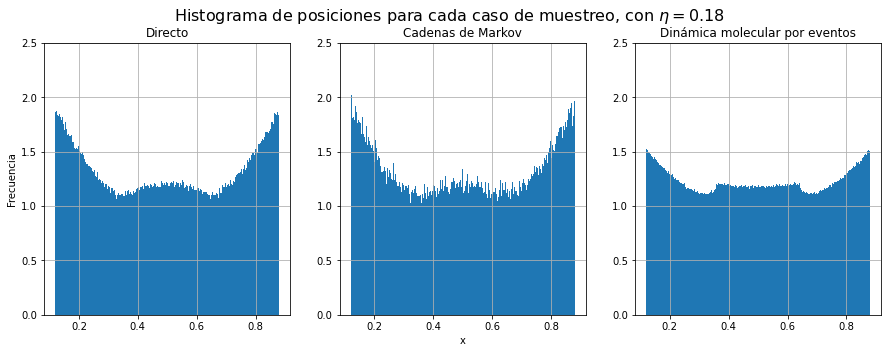

In [ ]:
#grafico del histograma
#datos de los tres histogramas
histo_data = [direct_histo_data, markov_histo_data, event_histo_data]

fig, ax = pylab.subplots(1, 3,figsize=(15,5))
fig.suptitle(r'Histograma de posiciones para cada caso de muestreo, con $\eta = 0.18$', fontsize=16)
titles = ["Directo", "Cadenas de Markov", u"Dinámica molecular por eventos"]
ax[1].set_xlabel('x')
ax[0].set_ylabel('Frecuencia')
for i in range(3):
    ax[i].set_ylim(0, 2.5)
    ax[i].set_title(titles[i])
    ax[i].grid()
    #density=True corresponde a la normalización
    ax[i].hist(histo_data[i], bins=1000, density=True)
pylab.show()

> Figure 2. Frequency histogram for the observable $x$, with $N = 4$ and $\sigma = 0.1197$, corresponding to $\eta = 0.18$. It is performed for direct sampling with $n_{runs} = 10^6$ by markov chains with $n_{steps} = 2 \times 10^6$, $\delta = 0.1$ and by molecular dynamics by events $n_{events} = 5 \times 10^6$.

Although it was expected, by the equiprobability principle, that the histogram would be flat, in reality there is no uniformity in the distribution of the observable $x$ for any of the sampling cases. Furthermore, it would appear that the extremes attract the most disks, and to a lesser extent, the center as well.

This can be thought through the geometry of the system. Although only the $x$ coordinate of the disk center-of-mass positions in the histogram is considered, in reality, the interval $[x-\sigma, x + \sigma]$ should not be occupied by any other disk in a given configuration. Moreover, the edges of the disks generate an empty space when touching each other. Therefore, considering the above, some values of $x$ are constrained, these being less likely than others. If much smaller disks are used that better accommodate the geometry of the system, then the histogram would have a flatter appearance, but this would imply that the number of disks must also increase or that many interactions must be performed in time for all positions in the system to be traversed.

### Molecular dynamics animation

We can generate a simple animation to visualize the current dynamics of the disks in the box. To do this, we draw circles of radius $\sigma = 0.15$ whose centers of mass evolve in time according to the event-driven molecular dynamics algorithm. Arrows are also drawn to visualize the change in the direction and walls of the unit-side box. Time intervals of $dt = 0.02$ are also considered, the simulation then consists of taking snapshots of the state of the system every $dt$ and finally joining these snapshots into a single animated image.

time 0.02
time 0.04
time 0.06
time 0.08
time 0.1
time 0.12000000000000001
time 0.14
time 0.16
time 0.18
time 0.19999999999999998
time 0.21999999999999997
time 0.23999999999999996
time 0.25999999999999995
time 0.27999999999999997
time 0.3
time 0.32
time 0.34
time 0.36000000000000004
time 0.38000000000000006
time 0.4000000000000001
time 0.4200000000000001
time 0.4400000000000001
time 0.46000000000000013
time 0.48000000000000015
time 0.5000000000000001
time 0.5200000000000001
time 0.5400000000000001
time 0.5600000000000002
time 0.5800000000000002
time 0.6000000000000002
time 0.6200000000000002
time 0.6400000000000002
time 0.6600000000000003
time 0.6800000000000003
time 0.7000000000000003
time 0.7200000000000003
time 0.7400000000000003
time 0.7600000000000003
time 0.7800000000000004
time 0.8000000000000004
time 0.8200000000000004
time 0.8400000000000004
time 0.8600000000000004
time 0.8800000000000004
time 0.9000000000000005
time 0.9200000000000005
time 0.9400000000000005
time 0.96000000000

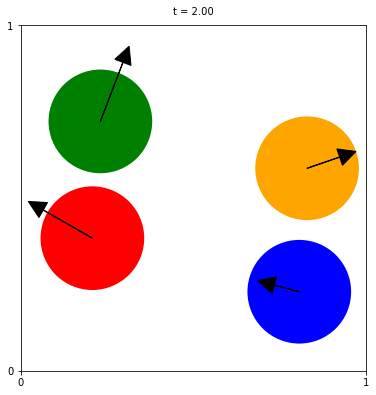

In [ ]:
#animación
import os, math, pylab

#lugar donde se almacenarán las imágenes de la simulación
output_dir = "event_disks_box_movie"
#colores de las 4 partículas
colors = ['r', 'b', 'g', 'orange']

def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a)/vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else: 
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1]**2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq*(del_x_sq - 4.0*sigma**2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = -(scal + math.sqrt(Upsilon))/del_v_sq
    else:
        del_t = float('inf')
    return del_t

def min_arg(l):
    return min(zip(l, range(len(l))))

#método para calcular el tiempo mínimo al que corresponde el próximo evento
def compute_next_event(pos, vel):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    return min_arg(wall_times + pair_times)

#método para calcular el cambio de las velocidades después de la colisión
def compute_new_velocities(pos, vel, next_event_arg):
    if next_event_arg < len(singles):
        collision_disk, direction = singles[next_event_arg]
        vel[collision_disk][direction] *= -1.0
    else:
        a, b = pairs[next_event_arg-len(singles)]
        del_x = [pos[b][0]-pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0]**2 + del_x[1]**2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0]*e_perp[0] + del_v[1]*e_perp[1]
        for k in range(2):
            vel[a][k] +=e_perp[k]*scal
            vel[b][k] -=e_perp[k]*scal
            
#parámetros de la animación
pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
pylab.gcf().set_size_inches(6, 6)
img = 0
if not os.path.exists(output_dir): os.makedirs(output_dir)#se crea el directorio
def snapshot(t, pos, vel, colors, arrow_scale=.2):#snapshot en un tiempo fijo
    global img
    pylab.cla()
    pylab.axis([0, 1, 0, 1])
    pylab.setp(pylab.gca(), xticks=[0, 1], yticks=[0, 1])
    for (x, y), (dx, dy), c in zip(pos, vel, colors):
        dx*=arrow_scale
        dy*=arrow_scale
        #se dibujan los círculos de radio sigma
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
        #se dibujan las flechas que indican la dirección de las partículas
        pylab.arrow(x, y, dx, dy, fc="k", ec="k", head_width=0.05, head_length=0.05)
    pylab.text(.5, 1.03, 't = %.2f'%t, ha='center')
    #se almacenan las imagenes
    pylab.savefig(os.path.join(output_dir, '%04i.png'%img))
    img+=1
    
#parámetros iniciales
pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.15
t = 0.0
dt = 0.02
n_steps = 100
next_event, next_event_arg = compute_next_event(pos, vel)

snapshot(t, pos, vel, colors)

#se evoluciona el sistema
for step in range(n_steps):
    if dt:
        next_t = t + dt
    else:
        next_t = t + next_event
    while t + next_event <= next_t:
        t += next_event
        #se actualizan las posiciones en línea recta
        for k, l in singles: pos[k][l] +=vel[k][l] * next_event
        compute_new_velocities(pos, vel, next_event_arg)
        next_event, next_event_arg = compute_next_event(pos, vel)
    remain_t = next_t - t
    for k, l in singles: pos[k][l] += vel[k][l] * remain_t
    t += remain_t
    next_event -= remain_t
    snapshot(t, pos, vel, colors)
    print('time', t)

In [ ]:
import imageio
filenames = os.listdir(output_dir)

with imageio.get_writer(output_dir+'/animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(output_dir+"/"+filename)
        writer.append_data(image)

<img src="event_disks_box_movie/animation.gif" alt="drawing" width="500"/>

> Figure 3. Event-driven molecular dynamics animation for rigid disks in a unit-side box, with $N = 4$, $\sigma = 0.15$, $100$ time intervals and $dt$ steps of $0.02$ .

The animation allows us to see the dynamics of the particles inside the box. It can be seen that initially they move in a straight line in a given direction, but each time there is a collision against the wall or between pairs of particles, there are changes in the direction of the velocity as expected.

## <center> IV. Conclusions
    
* For small values of the uncertainty of the uncertainty of the center-of-mass positions of the disks ($\delta_{xy} = 0.05$), it is obtained within some numerical precision that the probabilities of three arbitrary configurations for the 2D system is equal. That is, the equiprobability principle is satisfied.
    
* The event-driven molecular dynamics algorithm allows longer runs and more consistent results are obtained than for the other two sampling cases. However, the Monte Carlo methods are presented as a good approximation to it.

* When studying the histogram of the distribution of the positions of the observable $x$ for a density of $\eta = 18$, it is observed that it is not uniform in any of the cases, this tries to be explained by the low density and the geometry of the system. 

* Through simulation, it was possible to gain more understanding of the actual dynamics of the disks inside the box.

## References

-[1] Guilhoto, L. F. (2017). Applying Markov Chains to Monte Carlo Integration. University of Colorado. Recuperado de: https://bit.ly/3iafkWM

-[2] Landau, R. H., Paez, M. J., y Bordeianu C. C. (2007). Computational Physics: Problem Solving with Computers. Wiley-VCH Verlag GmbH \& Co. KGaA.

-[3] Cruz Kuri, L., Durand Niconoff, J. S., & Romero Patiño, R. (2004). El método de Monte Carlo.

-[4] Illana, J. I. (2013). Metodos Monte Carlo. Universidad de Granada. Recuperado de: https://bit.ly/342SWKb

-[5] Lefevre, C. A. Markov Chain Model of Population Growth with an Application in Epidemiology. Biom. J., 30: 165-173. ttps://doi.org/10.1002/bimj.4710300207

-[6] González K. (2012). Aplicaciones del método de Monte Carlo a la solución de algunos problemas financieros. 

-[7] Gabriel, K.R., y Neumann, J. (1962), A Markov chain model for daily rainfall occurrence at Tel Aviv. Q.J.R. Meteorol. Soc., 88: 90-95. https://doi.org/10.1002/qj.49708837511

-[8] Ching W., y Kwok-Po Ng M. (2016). Markov Chains: Models, Algorithms and Applications. Springer.

-[9] Pan, J., & Nagurney, A. (1994). Using Markov chains to model human migration in a network equilibrium framework. Mathematical and computer modelling, 19(11), 31-39.

-[10] Gordan Zitkovic. (2015). Brownian motion as a Markov Process. University of Texas. Recuperado de: https://bit.ly/3cBEKvh

-[11] Von Hilgers, P., & Langville, A. N. (2006). The five greatest applications of Markov chains. In Proceedings of the Markov Anniversary Meeting (pp. 155-158). Boston Press.

-[12] Etienne Bernard ( 2011). Algorithms and applications of the Monte Carlo method: Two-dimensional melting
and perfect sampling. Data Analysis, Statistics and Probability [physics.data-an]. Université Pierre
et Marie Curie.

-[13] Krauth  W. (2006). Statistical  Mechanics: Algorithms and Computations. Oxford University Press.

-[14] Fitzpatrick, R. (2006). The principle of equal a priori probabilities. Recuperado de: http://farside.ph.utexas.edu/teaching/sm1/lectures/node25.html

-[15] Landau D. P., y Binder, K. (2005). A Guide to Monte Carlo Simulations in Statistical Physics. Cambridge University Press.

-[16] Alder, B. J., & Wainwright, T. E. (1959). Studies in Molecular Dynamics. I. General Method. The Journal of Chemical Physics, 31(2), 459–466. https://doi.org/10.1063/1.1730376

## Acknowledgements

I would like to thank the University of Antioquia for promoting free and open education, and allowing the existence of spaces where knowledge can be developed without prejudice of any kind. I would also like to thank Dr. Johans M. Restrepo, professor of the Statistical Physics course at the University of Antioquia, for his dedication to the search for more didactic teaching methods.